<a href="https://colab.research.google.com/github/ranesh2k5/Shape_Detection/blob/main/Object_Detection_ELC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import PIL
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from matplotlib import image as mpimg


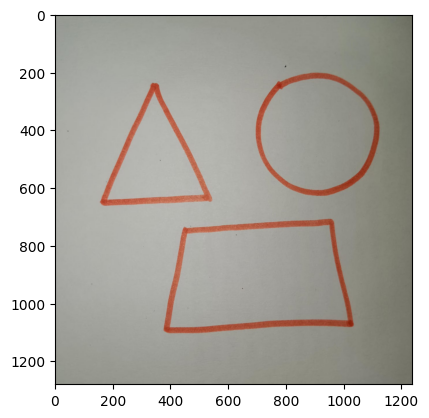

In [ ]:
img=Image.open("9.jpeg")
plt.imshow(img)

In [ ]:
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1238, 1280)
RGB


In [ ]:
img=np.array(img)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

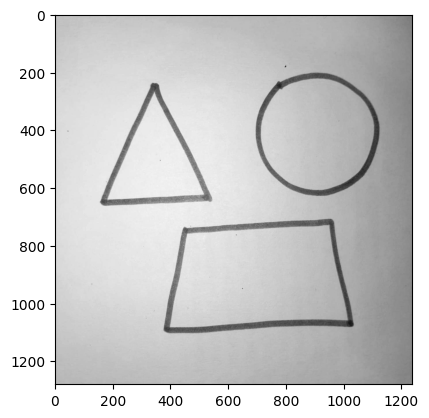

In [ ]:
plt.imshow(gray,cmap='gray')

In [ ]:
_,threshold=cv2.threshold(gray,110,225,cv2.THRESH_BINARY_INV)

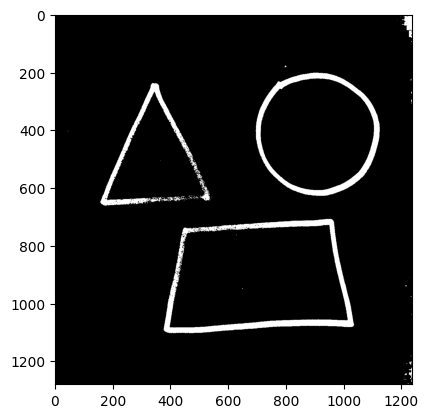

In [ ]:
plt.imshow(threshold, cmap='gray')

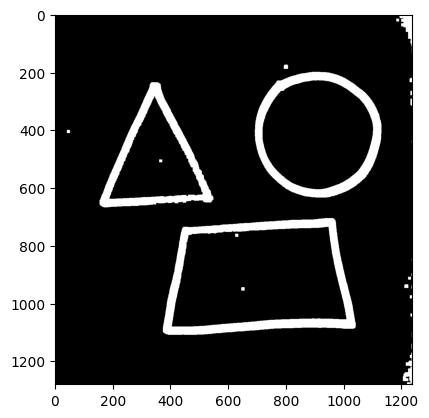

In [ ]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(4,4))
kernelc=cv2.getStructuringElement(cv2.MORPH_RECT,(6,6))
kernelo=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
dilated=cv2.dilate(threshold,kernel, iterations=3)
plt.imshow(dilated,cmap='gray')



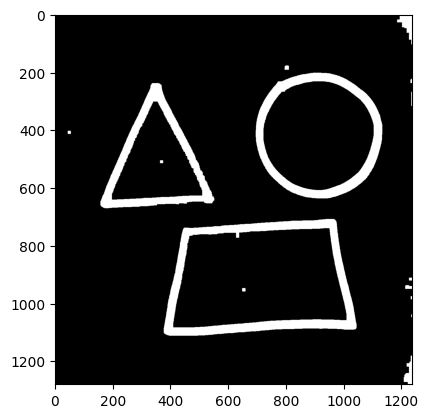

In [ ]:
closed=cv2.morphologyEx(dilated,cv2.MORPH_CLOSE,kernelc,iterations=3)

plt.imshow(closed,cmap='gray')

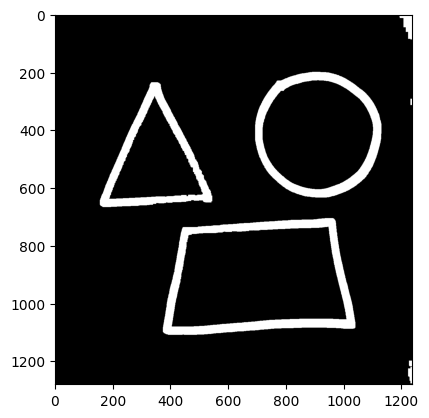

In [ ]:
opening=cv2.morphologyEx(dilated,cv2.MORPH_OPEN,kernelo,iterations=8)

plt.imshow(opening,cmap='gray')


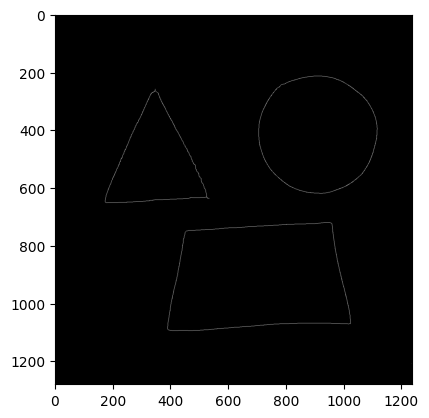

In [ ]:
thinned=cv2.ximgproc.thinning(opening)
plt.imshow(thinned,cmap='gray')


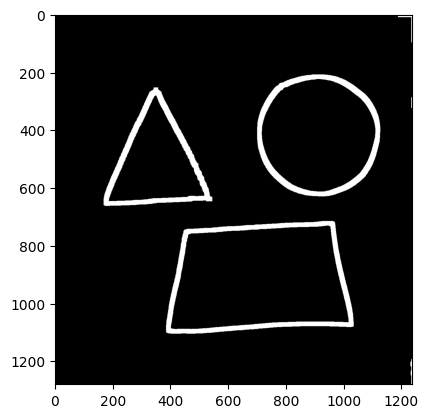

In [ ]:
dilated_t=cv2.dilate(thinned,kernel, iterations=5)
plt.imshow(dilated_t,cmap='gray')


In [ ]:
contours,_=cv2.findContours(dilated_t,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
i=0
for contour in contours:
    if i == 0:
        i = 1
        continue
    approx = cv2.approxPolyDP(
     contour, 0.02*cv2.arcLength(contour, True), True)

    cv2.drawContours(img, [contour],0,(0,0,255),2)

    M=cv2.moments(contour)
    if M['m00']!=0.0:
        x=int(M['m10']/M['m00'])
        y=int(M['m01']/M['m00'])

    if len(approx) == 3:
        cv2.putText(img,'Triangle',(x,y),
                    cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0),5)

    elif len(approx) == 4:
        cv2.putText(img,'Rectangle',(x,y),
                    cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),5)

    elif len(approx) == 5:
        cv2.putText(img,'Pentagon',(x,y),
                    cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,255),5)

    elif len(approx) == 6:
        cv2.putText(img,'Hexagon',(x,y),
                    cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,255),2)

    else:
        cv2.putText(img,'Circle',(x,y),
                    cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),5)


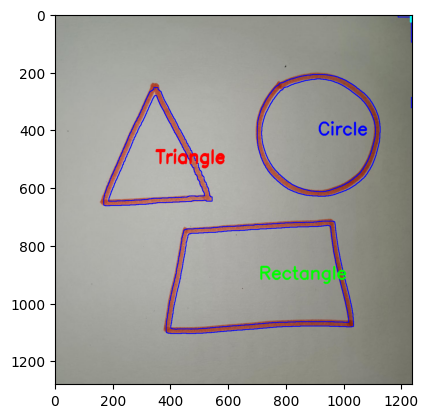

In [ ]:
plt.imshow(img)